# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [ ]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

In [ ]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

## 1.2 preprocessing of `project_subject_categories`

In [ ]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [ ]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [ ]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

# Train Test Split ( train-cv-test : 64-16-20)

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(project_data,project_data['project_is_approved'],test_size = 0.2, stratify = project_data['project_is_approved'])
X_train,X_cv,y_train,y_cv  = tts(X_train,y_train,test_size=0.2,stratify=y_train)

In [ ]:
X_train.drop(['project_is_approved'],axis=1,inplace=True)
X_test.drop(['project_is_approved'],axis=1,inplace=True)
X_cv.drop(['project_is_approved'],axis=1,inplace=True)

#  Write into new CSV file  - to save time


In [ ]:
y_train.to_csv('Y_train')
y_cv.to_csv('Y_cv')
y_test.to_csv('Y_test')
X_train.to_csv('X_train')
X_test.to_csv('X_test')
X_cv.to_csv('X_cv')

In [2]:
X_train = pd.read_csv("X_train")
y_train = pd.read_csv("Y_train",names = ['Unnamed0: 1',"is_approved"] )
X_cv = pd.read_csv("X_cv")
y_cv = pd.read_csv("Y_cv",names = ['Unnamed0: 1',"is_approved"] )
X_test = pd.read_csv("X_test")
y_test = pd.read_csv("Y_test",names = ['Unnamed0: 1',"is_approved"] )

In [ ]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

In [ ]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

In [ ]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_train.append(sent.lower().strip())

In [ ]:
X_train['processed_essay'] = preprocessed_essays_train
X_train.to_csv("X_train")

In [ ]:
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())

In [ ]:
X_test['processed_essay'] = preprocessed_essays_test
X_test.to_csv("X_test")

In [ ]:
preprocessed_essays_cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays_cv.append(sent.lower().strip())

In [ ]:
X_cv['processed_essay'] = preprocessed_essays_cv
X_cv.to_csv("X_cv")

In [ ]:
# after preprocesing
preprocessed_essays[20000]

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [ ]:

'''pro_title = list(project_data['project_title'].values)
" ".join(i for i in re.sub('[^A-Za-z0-9]',' ',pro_title[115]).lower().split())'''

In [ ]:
# similarly you can preprocess the titles also
preprocessed_titles_train =[]
for title in tqdm(X_train['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e not in stopwords)
        preprocessed_titles_train.append(des.lower().strip())        

In [ ]:
X_train['processed_title'] = preprocessed_titles_train
X_train.to_csv("X_train")

In [ ]:
preprocessed_titles_test =[]
for title in tqdm(X_test['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e not in stopwords)
        preprocessed_titles_test.append(des.lower().strip()) 

In [ ]:
X_test['processed_title'] = preprocessed_titles_test
X_test.to_csv("X_test")

In [ ]:
preprocessed_titles_cv =[]
for title in tqdm(X_cv['project_title'].values):
        des = decontracted(title)
        des = des.replace("\\r",' ')
        des = des.replace('\\"',' ')
        des = des.replace('\\n',' ')
        des = re.sub('[^A-Za-z0-9]+',' ',des)
        des = ' '.join(e for e in des.split() if e not in stopwords)
        preprocessed_titles_cv.append(des.lower().strip()) 

In [ ]:
X_cv['processed_title'] = preprocessed_titles_cv
X_cv.to_csv("X_cv")

## 1.5 Preparing data for models

In [ ]:
project_data.columns

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

# Clean Project Categories - Response Coding

In [ ]:
# response coding
X_total = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
X_total_sub = X_total[['clean_categories','project_is_approved']]

In [ ]:
X_total_sub_0 = X_total_sub[X_total_sub['project_is_approved']==0]
X_total_sub_1 = X_total_sub[X_total_sub['project_is_approved']==1]

In [ ]:
counter_0 = dict()
for title in X_total_sub_0['clean_categories'].values:
    if title in counter_0.keys():
        counter_0[title]+=1
    else:
        counter_0[title]=1
counter_1 = dict()
for title in X_total_sub_1['clean_categories'].values:
    if title in counter_1.keys():
        counter_1[title]+=1
    else:
        counter_1[title]= 1
    

# Training Data

In [ ]:
#training data
for cat in X_train['clean_categories'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_train.loc[X_train.clean_categories==cat,'Count_1'] = counter_1[cat]/total
        X_train.loc[X_train.clean_categories==cat,'Count_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_train.loc[X_train.clean_categories==cat,'Count_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_train.loc[X_train.clean_categories==cat,'Count_0'] = counter_0[cat]/total

In [ ]:
X_train.to_csv('X_train')

In [ ]:
set(X_test['clean_categories']) ^ set(list(counter_0.keys())+list(counter_1.keys()))

# Validation Data

In [ ]:
#validation data
for cat in X_cv['clean_categories'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_cv.loc[X_cv.clean_categories==cat,'Count_1'] = counter_1[cat]/total
        X_cv.loc[X_cv.clean_categories==cat,'Count_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_cv.loc[X_cv.clean_categories==cat,'Count_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_cv.loc[X_cv.clean_categories==cat,'Count_0'] = counter_0[cat]/total
        else:
            X_cv.loc[X_cv.clean_categories==cat,'Count_1'] = 0.5
            X_cv.loc[X_cv.clean_categories==cat,'Count_0'] = 0.5

In [ ]:
X_cv.to_csv('X_cv')

# Test Data

In [ ]:
#test  data
for cat in X_test['clean_categories'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_test.loc[X_test.clean_categories==cat,'Count_1'] = counter_1[cat]/total
        X_test.loc[X_test.clean_categories==cat,'Count_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_test.loc[X_test.clean_categories==cat,'Count_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_test.loc[X_test.clean_categories==cat,'Count_0'] = counter_0[cat]/total
        else:
            X_test.loc[X_test.clean_categories==cat,'Count_1'] = 0.5
            X_test.loc[X_test.clean_categories==cat,'Count_0'] = 0.5

In [ ]:
X_test.to_csv('X_test')


In [ ]:
X_test.shape

# Clean Project SubCategories - Response Coding

In [ ]:
'''# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)
categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of Train matrix after one hot encodig ",categories_one_hot_train.shape)
print("Shape of Test matrix after one hot encodig ",categories_one_hot_test.shape)
print("Shape of CV matrix after one hot encodig ",categories_one_hot_cv.shape)'''


In [ ]:
X_total = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
X_total_sub = X_total[['clean_subcategories','project_is_approved']]

In [ ]:
X_total_sub_0 = X_total_sub[X_total_sub['project_is_approved']==0]
X_total_sub_1 = X_total_sub[X_total_sub['project_is_approved']==1]

In [ ]:
counter_0 = dict()
for title in X_total_sub_0['clean_subcategories'].values:
    if title in counter_0.keys():
        counter_0[title]+=1
    else:
        counter_0[title]=1
counter_1 = dict()
for title in X_total_sub_1['clean_subcategories'].values:
    if title in counter_1.keys():
        counter_1[title]+=1
    else:
        counter_1[title]= 1
    

# Training

In [ ]:
#training data
for cat in X_train['clean_subcategories'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_train.loc[X_train.clean_subcategories==cat,'Count_sub_1'] = counter_1[cat]/total
        X_train.loc[X_train.clean_subcategories==cat,'Count_sub_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_train.loc[X_train.clean_subcategories==cat,'Count_sub_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_train.loc[X_train.clean_subcategories==cat,'Count_sub_0'] = counter_0[cat]/total

In [ ]:
X_train.to_csv('X_train')

# Validation

In [ ]:
#validation data
for cat in X_cv['clean_subcategories'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_cv.loc[X_cv.clean_subcategories==cat,'Count_sub_1'] = counter_1[cat]/total
        X_cv.loc[X_cv.clean_subcategories==cat,'Count_sub_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_cv.loc[X_cv.clean_subcategories==cat,'Count_sub_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_cv.loc[X_cv.clean_subcategories==cat,'Count_sub_0'] = counter_0[cat]/total
        if cat not in counter_1.keys() and cat not in counter_0.keys():
            X_cv.loc[X_cv.clean_subcategories==cat,'Count_sub_1'] = 0.5
            X_cv.loc[X_cv.clean_subcategories==cat,'Count_sub_0'] = 0.5

In [ ]:
X_cv.to_csv('X_cv')

# Test data

In [ ]:
#test  data
for cat in X_test['clean_subcategories'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_test.loc[X_test.clean_subcategories==cat,'Count_sub_1'] = counter_1[cat]/total
        X_test.loc[X_test.clean_subcategories==cat,'Count_sub_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_test.loc[X_test.clean_subcategories==cat,'Count_sub_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_test.loc[X_test.clean_subcategories==cat,'Count_sub_0'] = counter_0[cat]/total
        if cat not in counter_1.keys() and cat not in counter_0.keys():
            X_test.loc[X_test.clean_subcategories==cat,'Count_sub_1'] = 0.5
            X_test.loc[X_test.clean_subcategories==cat,'Count_sub_0'] = 0.5

In [ ]:
X_test.to_csv('X_test')

# School State -  response coding

In [ ]:
'''# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
sub_categories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
sub_categories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)
sub_categories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of Train matrix after one hot encodig ",sub_categories_one_hot_train.shape)
print("Shape of Test matrix after one hot encodig ",sub_categories_one_hot_test.shape)
print("Shape of CV matrix after one hot encodig ",sub_categories_one_hot_cv.shape)'''

In [ ]:
X_total = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
X_total_sub = X_total[['school_state','project_is_approved']]

In [ ]:
X_total_sub_0 = X_total_sub[X_total_sub['project_is_approved']==0]
X_total_sub_1 = X_total_sub[X_total_sub['project_is_approved']==1]

In [ ]:
# counter_0 = dict()
for title in X_total_sub_0['school_state'].values:
    if title in counter_0.keys():
        counter_0[title]+=1
    else:
        counter_0[title]=1
counter_1 = dict()
for title in X_total_sub_1['school_state'].values:
    if title in counter_1.keys():
        counter_1[title]+=1
    else:
        counter_1[title]= 1
    

# Training

In [ ]:
#training data
for cat in X_train['school_state'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_train.loc[X_train.school_state==cat,'Count_school_state_1'] = counter_1[cat]/total
        X_train.loc[X_train.school_state==cat,'Count_school_state_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_train.loc[X_train.school_state==cat,'Count_school_state_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_train.loc[X_train.school_state==cat,'Count_school_state_0'] = counter_0[cat]/total

In [ ]:
X_train.to_csv('X_train')

# Validation

In [ ]:
#validation data
for cat in X_cv['school_state'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_cv.loc[X_cv.school_state==cat,'Count_school_state_1'] = counter_1[cat]/total
        X_cv.loc[X_cv.school_state==cat,'Count_school_state_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_cv.loc[X_cv.school_state==cat,'Count_school_state_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_cv.loc[X_cv.school_state==cat,'Count_school_state_0'] = counter_0[cat]/total
        if cat not in counter_1.keys() and cat not in counter_0.keys():
            X_cv.loc[X_cv.school_state==cat,'Count_school_state_1'] = 0.5
            X_cv.loc[X_cv.school_state==cat,'Count_school_state_0'] = 0.5

In [ ]:
X_cv.to_csv('X_cv')

# Test Data

In [ ]:
#test  data
for cat in X_test['school_state'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_test.loc[X_test.school_state==cat,'Count_school_state_1'] = counter_1[cat]/total
        X_test.loc[X_test.school_state==cat,'Count_school_state_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_test.loc[X_test.school_state==cat,'Count_school_state_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_test.loc[X_test.school_state==cat,'Count_school_state_0'] = counter_0[cat]/total
        if cat not in counter_1.keys() and cat not in counter_0.keys():
            X_test.loc[X_test.school_state==cat,'Count_school_state_1'] = 0.5
            X_test.loc[X_test.school_state==cat,'Count_school_state_0'] = 0.5

In [ ]:
X_test.to_csv('X_test')

# Teacher Prefix - response coding

In [ ]:
'''# you can do the similar thing with state, teacher_prefix and project_grade_category also
vectorizer = CountVectorizer(vocabulary=list(project_data['school_state'].unique()),lowercase = False,binary = True)
vectorizer.fit(X_train['school_state'].values)
state_one_hot_train = vectorizer.transform(X_train['school_state'].values)
state_one_hot_test =  vectorizer.transform(X_test['school_state'].values)
state_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of Train matrix after one hot encoding ", state_one_hot_train.shape)
print("Shape of Test matrix after one hot encoding ", state_one_hot_test.shape)
print("Shape of cv matrix after one hot encoding ", state_one_hot_cv.shape)'''

In [ ]:
X_total = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
X_total_sub = X_total[['teacher_prefix','project_is_approved']]

In [ ]:
X_total_sub_0 = X_total_sub[X_total_sub['project_is_approved']==0]
X_total_sub_1 = X_total_sub[X_total_sub['project_is_approved']==1]

In [ ]:
counter_0 = dict()
for title in X_total_sub_0['teacher_prefix'].values:
    if title in counter_0.keys():
        counter_0[title]+=1
    else:
        counter_0[title]=1
counter_1 = dict()
for title in X_total_sub_1['teacher_prefix'].values:
    if title in counter_1.keys():
        counter_1[title]+=1
    else:
        counter_1[title]= 1
    

In [ ]:
#training data
for cat in X_train['teacher_prefix'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_train.loc[X_train.teacher_prefix==cat,'Count_prefix_1'] = counter_1[cat]/total
        X_train.loc[X_train.teacher_prefix==cat,'Count_prefix_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_train.loc[X_train.teacher_prefix==cat,'Count_prefix_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_train.loc[X_train.teacher_prefix==cat,'Count_prefix_0'] = counter_0[cat]/total

In [ ]:
X_train.to_csv('X_train')

In [ ]:
#validation data
for cat in X_cv['teacher_prefix'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_cv.loc[X_cv.teacher_prefix==cat,'Count_prefix_1'] = counter_1[cat]/total
        X_cv.loc[X_cv.teacher_prefix==cat,'Count_prefix_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_cv.loc[X_cv.teacher_prefix==cat,'Count_prefix_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_cv.loc[X_cv.teacher_prefix==cat,'Count_prefix_0'] = counter_0[cat]/total
        if cat not in counter_1.keys() and cat not in counter_0.keys():
            X_cv.loc[X_cv.teacher_prefix==cat,'Count_prefix_1'] = 0.5
            X_cv.loc[X_cv.teacher_prefix==cat,'Count_prefix_0'] = 0.5

In [ ]:
X_cv.to_csv('X_cv')

In [ ]:
#test  data
for cat in X_test['teacher_prefix'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_test.loc[X_test.teacher_prefix==cat,'Count_prefix_1'] = counter_1[cat]/total
        X_test.loc[X_test.teacher_prefix==cat,'Count_prefix_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_test.loc[X_test.teacher_prefix==cat,'Count_prefix_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_test.loc[X_test.teacher_prefix==cat,'Count_prefix_0'] = counter_0[cat]/total
        if cat not in counter_1.keys() and cat not in counter_0.keys():
            X_test.loc[X_test.teacher_prefix==cat,'Count_prefix_1'] = 0.5
            X_test.loc[X_test.teacher_prefix==cat,'Count_prefix_0'] = 0.5

In [ ]:
X_test.to_csv('X_test')

# Project Grade Category - response coding

In [ ]:
'''#https://stackoverflow.com/questions/11620914/removing-nan-values-from-an-array
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
vectorizer = CountVectorizer(vocabulary=list(filter(lambda v:v==v,project_data['teacher_prefix'].unique())),lowercase = False,binary = True)
prefix_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ", prefix_one_hot.shape)'''

In [ ]:
X_total = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)
X_total_sub = X_total[['project_grade_category','project_is_approved']]
X_total_sub_0 = X_total_sub[X_total_sub['project_is_approved']==0]
X_total_sub_1 = X_total_sub[X_total_sub['project_is_approved']==1]

In [ ]:
counter_0 = dict()
for title in X_total_sub_0['project_grade_category'].values:
    if title in counter_0.keys():
        counter_0[title]+=1
    else:
        counter_0[title]=1
counter_1 = dict()
for title in X_total_sub_1['project_grade_category'].values:
    if title in counter_1.keys():
        counter_1[title]+=1
    else:
        counter_1[title]= 1
    

In [ ]:
#training data
for cat in X_train['project_grade_category'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_train.loc[X_train.project_grade_category==cat,'Count_pro_1'] = counter_1[cat]/total
        X_train.loc[X_train.project_grade_category==cat,'Count_pro_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_train.loc[X_train.project_grade_category==cat,'Count_pro_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_train.loc[X_train.project_grade_category==cat,'Count_pro_0'] = counter_0[cat]/total

In [ ]:
X_train.to_csv('X_train')

In [ ]:
#validation data
for cat in X_cv['project_grade_category'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_cv.loc[X_cv.project_grade_category==cat,'Count_pro_1'] = counter_1[cat]/total
        X_cv.loc[X_cv.project_grade_category==cat,'Count_pro_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_cv.loc[X_cv.project_grade_category==cat,'Count_pro_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_cv.loc[X_cv.project_grade_category==cat,'Count_pro_0'] = counter_0[cat]/total
        if cat not in counter_1.keys() and cat not in counter_0.keys():
            X_cv.loc[X_cv.project_grade_category==cat,'Count_pro_1'] = 0.5
            X_cv.loc[X_cv.project_grade_category==cat,'Count_pro_0'] = 0.5

In [ ]:
X_cv.to_csv('X_cv')

In [ ]:
#test  data
for cat in X_test['project_grade_category'].values:
    if cat in counter_1.keys() and cat in counter_0.keys():
        total = counter_1[cat] + counter_0[cat]
        X_test.loc[X_test.project_grade_category==cat,'Count_pro_1'] = counter_1[cat]/total
        X_test.loc[X_test.project_grade_category==cat,'Count_pro_0'] = counter_0[cat]/total
    else:
        if cat in counter_1.keys() and cat not in counter_0.keys():
            total = counter_1[cat]
            X_test.loc[X_test.project_grade_category==cat,'Count_pro_1'] = counter_1[cat]/total
        if cat in counter_0.keys() and cat not in counter_1.keys():
            total = counter_0[cat]
            X_test.loc[X_test.project_grade_category==cat,'Count_pro_0'] = counter_0[cat]/total
        if cat not in counter_1.keys() and cat not in counter_0.keys():
            X_test.loc[X_test.project_grade_category==cat,'Count_pro_1'] = 0.5
            X_test.loc[X_test.project_grade_category==cat,'Count_pro_0'] = 0.5

In [ ]:
X_test.to_csv('X_test')

In [ ]:
'''vectorizer = CountVectorizer(vocabulary=list(filter(lambda v:v==v,project_data['project_grade_category'].unique())),lowercase = False,binary = True)
project_grade_one_hot = vectorizer.fit_transform(project_data['project_grade_category'].values.astype('U'))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ", project_grade_one_hot.shape)'''

### 1.5.2 Vectorizing Text data

# Bag of Words - Essay 

In [3]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#training
vectorizer = CountVectorizer(min_df=10)
essay_bow_train = vectorizer.fit_transform(X_train['processed_essay'][0:22445])
print("Shape of matrix after one hot encodig ",essay_bow_train.shape)

Shape of matrix after one hot encodig  (22445, 8899)


In [4]:
# validation
essay_bow_cv = vectorizer.transform(X_cv['processed_essay'][0:12000])
print("Shape of matrix after one hot encodig ",essay_bow_cv.shape)

Shape of matrix after one hot encodig  (12000, 8899)


In [5]:
#test
essay_bow_test = vectorizer.transform(X_test['processed_essay'][0:13000])
print("Shape of matrix after one hot encodig ",essay_bow_test.shape)

Shape of matrix after one hot encodig  (13000, 8899)


# # Bag of Words - Title

In [6]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df = 10)
title_bow_train = vectorizer.fit_transform(X_train['processed_title'][0:22445])
print("Shape of matrix after one hot encoding ",title_bow_train.shape)

Shape of matrix after one hot encoding  (22445, 1232)


In [7]:
title_bow_cv = vectorizer.transform(X_cv['processed_title'][0:12000])
print("Shape of matrix after one hot encoding ",title_bow_cv.shape)

Shape of matrix after one hot encoding  (12000, 1232)


In [8]:
title_bow_test = vectorizer.transform(X_train['processed_title'][0:13000])
print("Shape of matrix after one hot encoding ",title_bow_test.shape)

Shape of matrix after one hot encoding  (13000, 1232)


# TFIDF vectorizer - Essay

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
essay_tfidf_train = vectorizer.fit_transform(X_train['processed_essay'][0:22445])
print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)

Shape of matrix after one hot encodig  (22445, 8899)


In [10]:
essay_tfidf_cv = vectorizer.transform(X_cv['processed_essay'][0:12000])
print("Shape of matrix after one hot encodig ",essay_tfidf_cv.shape)

Shape of matrix after one hot encodig  (12000, 8899)


In [11]:
essay_tfidf_test = vectorizer.transform(X_test['processed_essay'][0:13000])
print("Shape of matrix after one hot encodig ",essay_tfidf_test.shape)

Shape of matrix after one hot encodig  (13000, 8899)


# Tfidf vectorizer - Title

In [12]:
vectorizer = TfidfVectorizer(min_df = 10)
title_tfidf_train = vectorizer.fit_transform(X_train['processed_title'][0:22445])
print("Shape of matrix after one hot encding ",title_tfidf_train.shape)

Shape of matrix after one hot encding  (22445, 1232)


In [13]:
title_tfidf_cv = vectorizer.transform(X_cv['processed_title'][0:12000])
print("Shape of matrix after one hot encding ",title_tfidf_cv.shape)

Shape of matrix after one hot encding  (12000, 1232)


In [14]:
title_tfidf_test = vectorizer.transform(X_test['processed_title'][0:13000])
print("Shape of matrix after one hot encding ",title_tfidf_test.shape)

Shape of matrix after one hot encding  (13000, 1232)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [ ]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

In [7]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [18]:
len(glove_words)

51510

# Using Pretrained Models: Avg W2V - on preprocessed essay

In [4]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_essays_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_train.append(vector)

print(len(avg_w2v_vectors_essays_train))
print(len(avg_w2v_vectors_essays_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 69918/69918 [00:24<00:00, 2883.97it/s]


69918
300


In [5]:
avg_w2v_vectors_essays_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_cv.append(vector)

print(len(avg_w2v_vectors_essays_cv))
print(len(avg_w2v_vectors_essays_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 17480/17480 [00:07<00:00, 2327.98it/s]


17480
300


In [6]:
avg_w2v_vectors_essays_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_essays_test.append(vector)

print(len(avg_w2v_vectors_essays_test))
print(len(avg_w2v_vectors_essays_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 21850/21850 [00:08<00:00, 2544.53it/s]


21850
300


# # Using Pretrained Models: Avg W2V - on preprocessed titles

In [8]:
#compute avg w2v for each title
avg_w2V_vectors_title_train =[]
for title in tqdm(X_train["processed_title"]):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_train.append(vector_title)
print(len(avg_w2V_vectors_title_train))
print(len(avg_w2V_vectors_title_train[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 69918/69918 [00:01<00:00, 50349.08it/s]


69918
300


In [9]:
#compute avg w2v for each title
avg_w2V_vectors_title_cv =[]
for title in tqdm(X_cv["processed_title"]):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_cv.append(vector_title)
print(len(avg_w2V_vectors_title_cv))
print(len(avg_w2V_vectors_title_cv[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 17480/17480 [00:00<00:00, 50470.05it/s]


17480
300


In [10]:
#compute avg w2v for each title
avg_w2V_vectors_title_test =[]
for title in tqdm(X_test["processed_title"]):
    vector_title = np.zeros(300)
    cnt_words = 0
    for word in title.split():
        if word in glove_words:
            vector_title+=model[word]
            cnt_words+=1
    if cnt_words!=0:
        vector_title/=cnt_words
    avg_w2V_vectors_title_test.append(vector_title)
print(len(avg_w2V_vectors_title_test))
print(len(avg_w2V_vectors_title_test[0]))
        

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 49065.96it/s]


21850
300


# Using Pretrained Models: TFIDF weighted W2V - Preprocessed Essay

In [11]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["processed_essay"])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [12]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 69918/69918 [02:49<00:00, 411.73it/s]


69918
300


In [13]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv.append(vector)

print(len(tfidf_w2v_vectors_cv))
print(len(tfidf_w2v_vectors_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 17480/17480 [00:42<00:00, 412.28it/s]


17480
300


In [14]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test["processed_essay"]): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 21850/21850 [00:49<00:00, 438.64it/s]


21850
300


# # Using Pretrained Models: TFIDF weighted W2V - Preprocessed Titles

In [15]:
# Similarly you can vectorize for title also
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train["processed_title"])
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [16]:
tfidf_w2v_vectors_title_train= []
for title in tqdm(X_train["processed_title"]):
    vector = np.zeros(300)
    tf_idf_wgt = 0
    for word in title.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(title.count(word)/len(title.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_title_train.append(vector)
print(len(tfidf_w2v_vectors_title_train))
print(len(tfidf_w2v_vectors_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 69918/69918 [00:02<00:00, 28979.21it/s]


69918
300


In [17]:
tfidf_w2v_vectors_title_cv= []
for title in tqdm(X_cv["processed_title"]):
    vector = np.zeros(300)
    tf_idf_wgt = 0
    for word in title.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(title.count(word)/len(title.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_title_cv.append(vector)
print(len(tfidf_w2v_vectors_title_cv))
print(len(tfidf_w2v_vectors_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 17480/17480 [00:00<00:00, 26506.72it/s]


17480
300


In [18]:
tfidf_w2v_vectors_title_test= []
for title in tqdm(X_test["processed_title"]):
    vector = np.zeros(300)
    tf_idf_wgt = 0
    for word in title.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(title.count(word)/len(title.split()))
            vector += (vec*tf_idf)
            tf_idf_weight+=tf_idf
    if tf_idf_weight!=0:
        vector/=tf_idf_weight
    tfidf_w2v_vectors_title_test.append(vector)
print(len(tfidf_w2v_vectors_title_test))
print(len(tfidf_w2v_vectors_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 21850/21850 [00:00<00:00, 25753.89it/s]


21850
300


### 1.5.3 Vectorizing Numerical features

In [ ]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head()

In [ ]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_cv = pd.merge(X_cv,price_data, on ='id',how = 'left')
X_test = pd.merge(X_test,price_data, on ='id',how = 'left')

In [ ]:
X_train.to_csv("X_train")
X_cv.to_csv("X_cv")
X_test.to_csv("X_test")

In [15]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'][0:22445].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'][0:22445].values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(X_cv['price'][0:12000].values.reshape(-1,1))
price_standardized_test = price_scalar.transform(X_test['price'][0:13000].values.reshape(-1,1))


Mean : 296.1382766763199, Standard deviation : 344.8704726363117


In [16]:
# standardized quantity columns 
quantity_scaler = StandardScaler()
quantity_scaler.fit(X_train['quantity'][0:22445].values.reshape(-1,1))
print(f"Mean :{quantity_scaler.mean_[0]},Standard Deviation :{np.sqrt(quantity_scaler.var_[0])}")
quantity_standardized_train = quantity_scaler.transform(X_train['quantity'][0:22445].values.reshape(-1,1))
quantity_standardized_cv = quantity_scaler.transform(X_cv['quantity'][0:12000].values.reshape(-1,1))
quantity_standardized_test = quantity_scaler.transform(X_test['quantity'][0:13000].values.reshape(-1,1))

Mean :17.07329026509245,Standard Deviation :27.018736795132188


In [17]:
#standardized projects proposed by teachers
project_scaler = StandardScaler()
project_scaler.fit(X_train['teacher_number_of_previously_posted_projects'][0:22445].values.reshape(-1,1))
print(f"Mean :{project_scaler.mean_[0]},Standard Deviation :{np.sqrt(project_scaler.var_[0])}")
project_standardized_train = project_scaler.transform(X_train['teacher_number_of_previously_posted_projects'][0:22445].values.reshape(-1,1))
project_standardized_cv = project_scaler.transform(X_cv['teacher_number_of_previously_posted_projects'][0:12000].values.reshape(-1,1))
project_standardized_test = project_scaler.transform(X_test['teacher_number_of_previously_posted_projects'][0:13000].values.reshape(-1,1))

Mean :11.235954555580307,Standard Deviation :27.93414779910708


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

# Set 1: categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW),<font color='red'> SET 1</font>

In [18]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((sparse.csr_matrix(X_train['Count_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_sub_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_sub_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_prefix_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_prefix_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(price_standardized_train),sparse.csr_matrix(quantity_standardized_train)
,sparse.csr_matrix(project_standardized_train),essay_bow_train,title_bow_train)).tocsr()

X_crov = hstack((sparse.csr_matrix(X_cv['Count_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_sub_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_sub_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_prefix_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_prefix_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(price_standardized_cv),sparse.csr_matrix(quantity_standardized_cv)
,sparse.csr_matrix(project_standardized_cv),essay_bow_cv,title_bow_cv)).tocsr()

X_ts = hstack((sparse.csr_matrix(X_test['Count_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_sub_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_sub_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_prefix_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_prefix_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(price_standardized_test),sparse.csr_matrix(quantity_standardized_test)
,sparse.csr_matrix(project_standardized_test),essay_bow_test,title_bow_test)).tocsr()

In [19]:
#nan value to 0
#X_mean = X[np.where(~np.isnan(X_tr.toarray()))].mean()
X_tr[np.where(np.isnan(X_tr.toarray()))] =0
#X_tr = sparse.csr_matrix(X_tr)
X_crov[np.where(np.isnan(X_crov.toarray()))] = 0
X_ts[np.where(np.isnan(X_ts.toarray()))] = 0 

# Find the best hyperparameter with max of AUC value  - max_depth and estimators

In [20]:
# batch wise prediction
# it will take model and data and predict probability 
# extend() function unlike append() doesn't add new list but extend the prior list
def proba_predict(model , data):
    y_pred_data = []
    n_loop = data.shape[0] - data.shape[0]%1000
    # here 1000 represents batch_size
    for i in range(0,n_loop,1000):
        y_pred_data.extend(model.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000!=0:
        y_pred_data.extend(model.predict_proba(data[n_loop:])[:,1])
    return(y_pred_data)


In [23]:
# from sklearn documentation 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
auc_score_train =[]
auc_score_cv =[]
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10] }
model = RandomForestClassifier()
clf = GridSearchCV(model,param_grid = parameters,cv = 2,scoring = "roc_auc")
clf.fit(X_tr,y_train[0:22445]["is_approved"])


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

# ROC _ CURVE 

In [25]:
from sklearn.metrics import roc_auc_score
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)

In [28]:
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

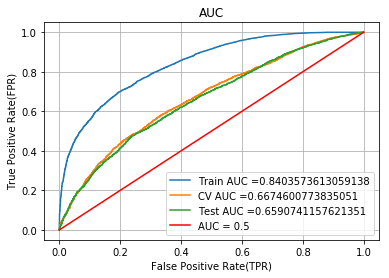

In [29]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Best Hyperparameter

In [30]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

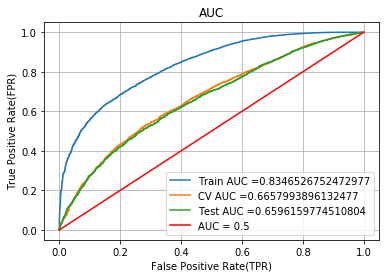

In [32]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

In [21]:
def pred_using_threshold(proba,thresh,tpr,fpr):
    flag = thresh[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(flag,3))
    pred_auc = []
    for i in proba:
        if i>=flag:
            pred_auc.append(1)
        else:
            pred_auc.append(0)
    return pred_auc

# Confusion Matrix

the maximum value of tpr*(1-fpr) 0.549586727899002 for threshold 0.841


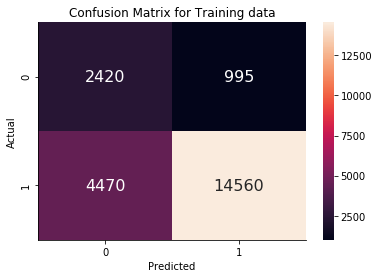

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# HeatMap on Training and Test data

In [34]:
temp = pd.DataFrame(clf.cv_results_['params'])
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)

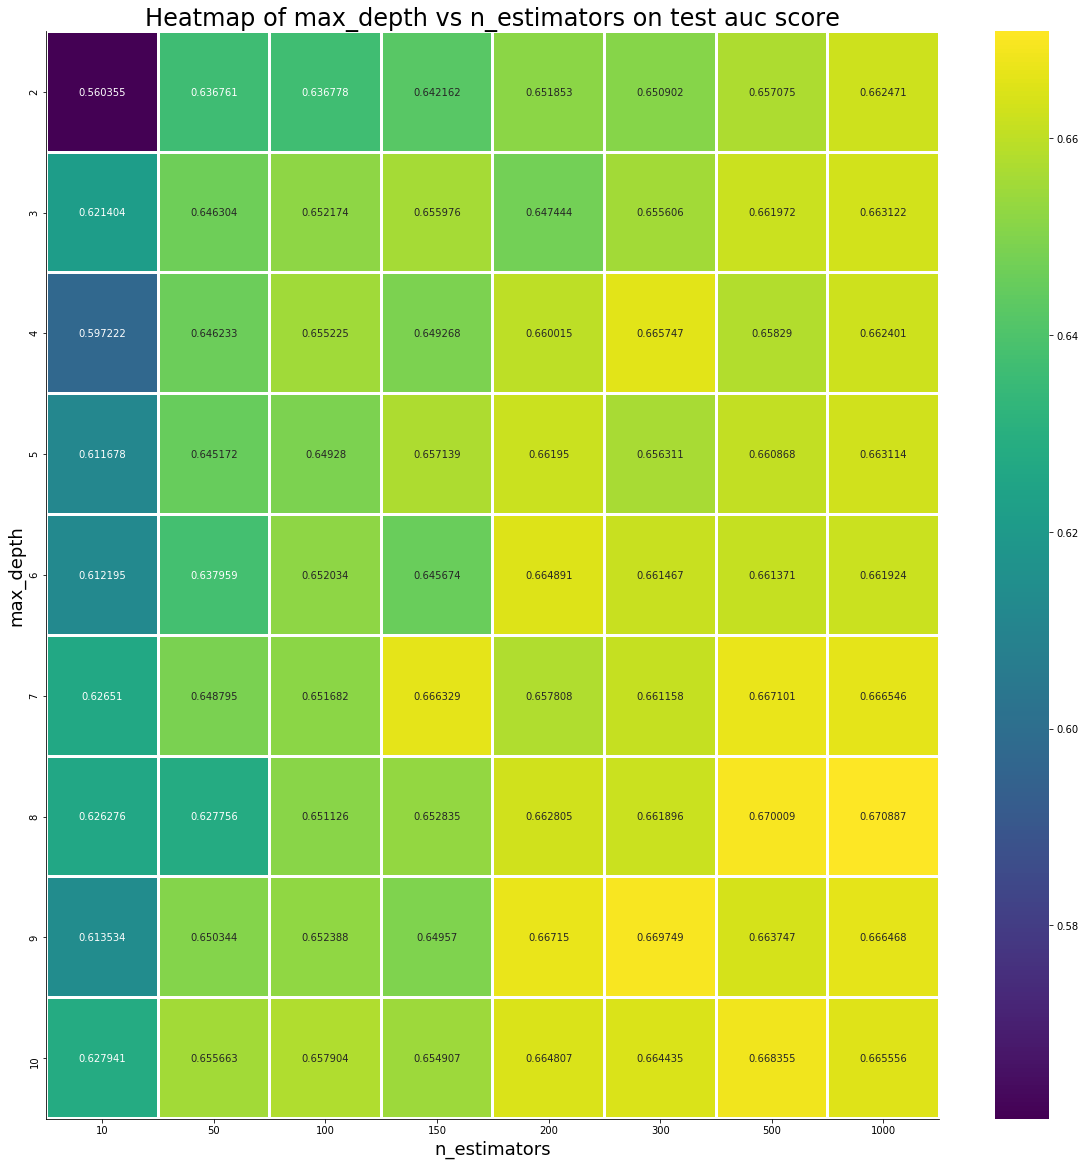

In [35]:
fig= plt.figure(figsize = (20,20))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

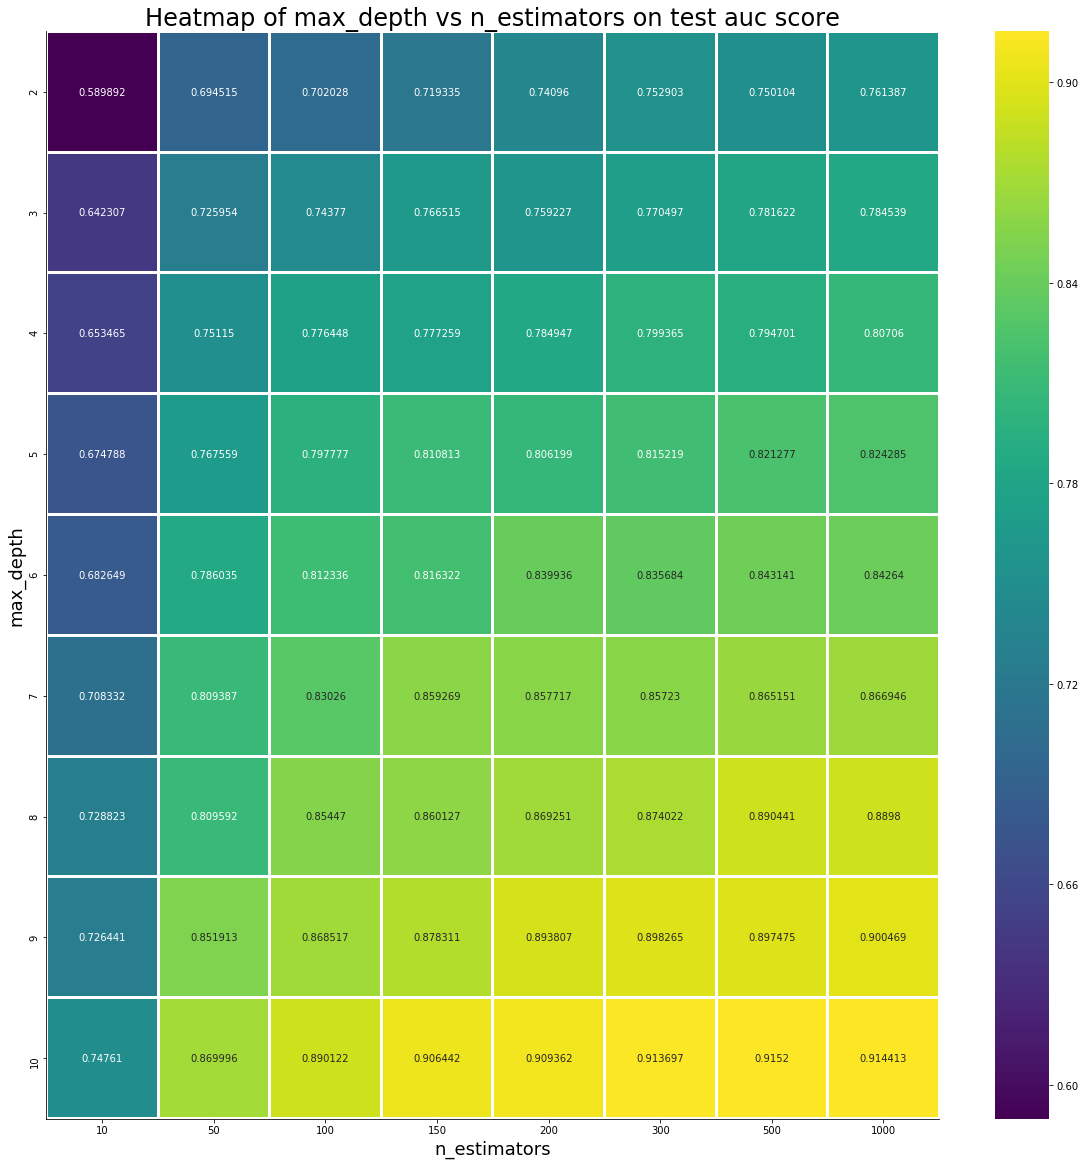

In [36]:
fig= plt.figure(figsize = (20,20))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

# categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)<font color='red'> SET 2</font>

In [37]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((sparse.csr_matrix(X_train['Count_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_sub_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_sub_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_prefix_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_prefix_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(price_standardized_train),sparse.csr_matrix(quantity_standardized_train)
,sparse.csr_matrix(project_standardized_train),essay_tfidf_train,title_tfidf_train)).tocsr()

X_crov = hstack((sparse.csr_matrix(X_cv['Count_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_sub_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_sub_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_prefix_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_prefix_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(price_standardized_cv),sparse.csr_matrix(quantity_standardized_cv)
,sparse.csr_matrix(project_standardized_cv),essay_tfidf_cv,title_tfidf_cv)).tocsr()

X_ts = hstack((sparse.csr_matrix(X_test['Count_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_sub_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_sub_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_prefix_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_prefix_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(price_standardized_test),sparse.csr_matrix(quantity_standardized_test)
,sparse.csr_matrix(project_standardized_test),essay_tfidf_test,title_tfidf_test)).tocsr()
    

In [38]:

#X_mean = X[np.where(~np.isnan(X_tr.toarray()))].mean()
X_tr[np.where(np.isnan(X_tr.toarray()))] =0
#X_tr = sparse.csr_matrix(X_tr)
X_crov[np.where(np.isnan(X_crov.toarray()))] = 0
X_ts[np.where(np.isnan(X_ts.toarray()))] = 0 

# # Find the best hyperparameter with max of AUC value  - max_depth and estimators

In [39]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500, 1000], "max_depth":[2, 3, 4, 5, 6, 7, 8] }
model = RandomForestClassifier()
clf = GridSearchCV(model,param_grid = parameters,cv = 2,scoring = "roc_auc")
clf.fit(X_tr,y_train[0:22445]["is_approved"])


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth': [2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [40]:
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

# Fitting  Best Estimator

In [41]:
model = clf.best_estimator_
model.fit(X_tr,y_train[0:22445]["is_approved"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

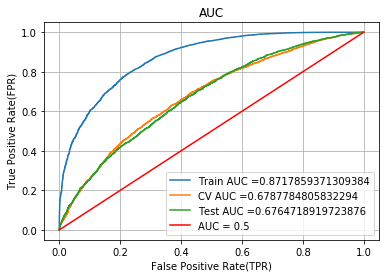

In [42]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix

the maximum value of tpr*(1-fpr) 0.6125130313622091 for threshold 0.845


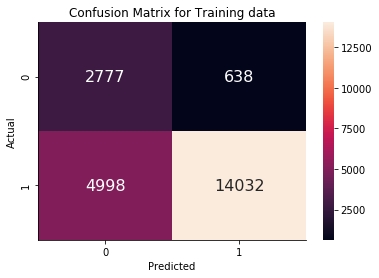

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

In [44]:
temp = pd.DataFrame(clf.cv_results_['params'])
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)

#  Heatmap on training and test data

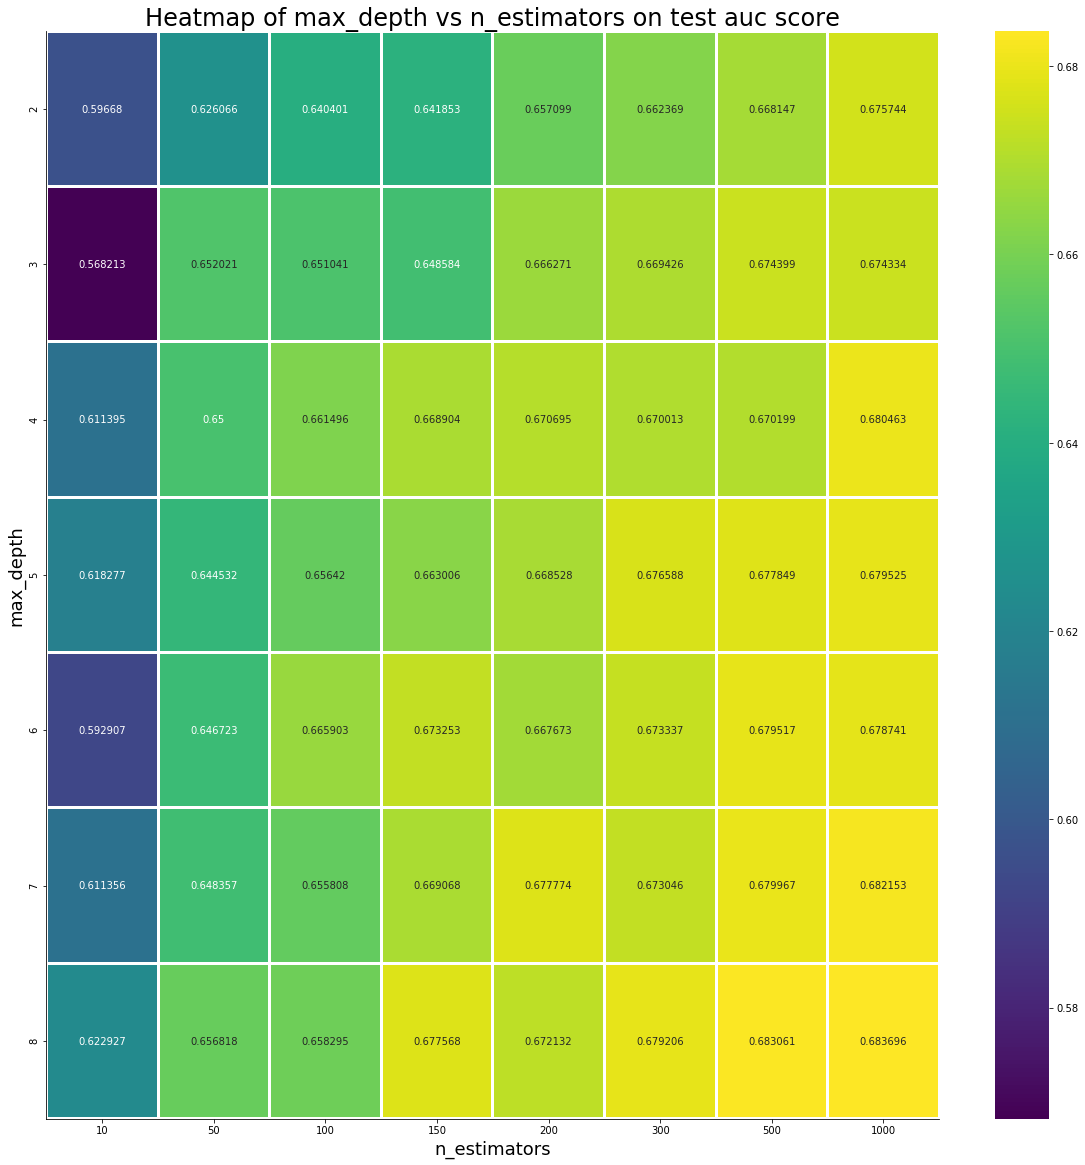

In [45]:
fig= plt.figure(figsize = (20,20))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

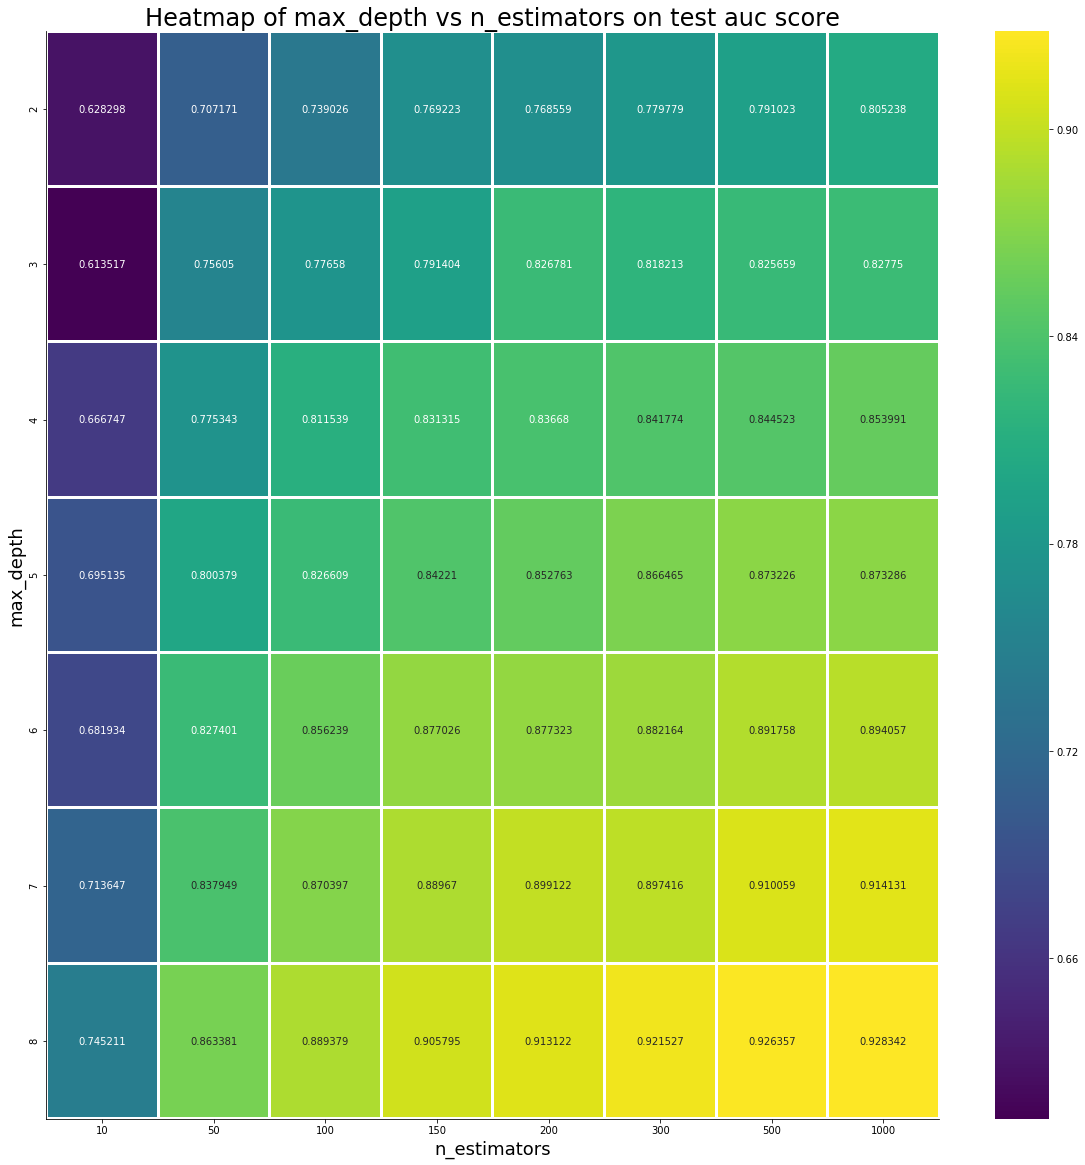

In [46]:
fig= plt.figure(figsize = (20,20))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

# categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V)<font color='red'> SET 3</font>

In [21]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((sparse.csr_matrix(X_train['Count_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_sub_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_sub_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_prefix_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_prefix_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(price_standardized_train),sparse.csr_matrix(quantity_standardized_train)
,sparse.csr_matrix(project_standardized_train),sparse.csr_matrix(avg_w2V_vectors_title_train[:22445]),sparse.csr_matrix(avg_w2v_vectors_essays_train[:22445]))).tocsr()

X_crov = hstack((sparse.csr_matrix(X_cv['Count_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_sub_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_sub_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_prefix_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_prefix_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(price_standardized_cv),sparse.csr_matrix(quantity_standardized_cv)
,sparse.csr_matrix(project_standardized_cv),sparse.csr_matrix(avg_w2V_vectors_title_cv[:12000]),sparse.csr_matrix(avg_w2v_vectors_essays_cv[:12000]))).tocsr()

X_ts = hstack((sparse.csr_matrix(X_test['Count_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_sub_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_sub_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_prefix_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_prefix_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(price_standardized_test),sparse.csr_matrix(quantity_standardized_test)
,sparse.csr_matrix(project_standardized_test),sparse.csr_matrix(avg_w2V_vectors_title_test[:13000]),sparse.csr_matrix(avg_w2v_vectors_essays_test[:13000]))).tocsr()
    

In [22]:
# inplace of nan replacing it with remaining values mean
# X_tr mean will be assigned to cv and test nan values also
# so that we don't do any data leakage
X = X_tr.toarray()
X_mean = X[np.where(~np.isnan(X_tr.toarray()))].mean()
X[np.where(np.isnan(X_tr.toarray()))] = X_mean
X_tr = X
X_tr = sparse.csr_matrix(X_tr)
X_crov[np.where(np.isnan(X_crov.toarray()))] =X_mean
X_ts[np.where(np.isnan(X_ts.toarray()))] = X_mean

# Find the best hyperparameter with max of AUC value  - max_depth and estimators

In [23]:
# considering some hyperparameters as we observed earlier that
# n_estimators higher value giving good result with every max_depth 6 and 8
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parameters = {"n_estimators":[200, 300, 500, 1000], "max_depth":[5,8]}
model = RandomForestClassifier()
clf = GridSearchCV(model,param_grid=parameters,cv=3,scoring = "roc_auc")
clf.fit(X_tr,y_train[0:22445]["is_approved"])
'''train_auc =[]
cv_auc = []
n_estimators=[10, 50, 100, 150, 200, 300]
for i in tqdm(n_estimators):
    model= RandomForestClassifier(max_depth = 5,n_estimators=i)
    model.fit(X_tr, y_train[:22445]["is_approved"])

    y_train_pred =proba_predict(model, X_tr)    
    y_cv_pred = proba_predict(model, X_crov)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train[:22445]["is_approved"],y_train_pred))
    cv_auc.append(roc_auc_score(y_cv[:12000]["is_approved"], y_cv_pred))
'''

'train_auc =[]\ncv_auc = []\nn_estimators=[10, 50, 100, 150, 200, 300]\nfor i in tqdm(n_estimators):\n    model= RandomForestClassifier(max_depth = 5,n_estimators=i)\n    model.fit(X_tr, y_train[:22445]["is_approved"])\n\n    y_train_pred =proba_predict(model, X_tr)    \n    y_cv_pred = proba_predict(model, X_crov)\n\n    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class\n    # not the predicted outputs        \n    train_auc.append(roc_auc_score(y_train[:22445]["is_approved"],y_train_pred))\n    cv_auc.append(roc_auc_score(y_cv[:12000]["is_approved"], y_cv_pred))\n'

In [27]:
# proba_predict fuction defined above
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

# Fitting Best Estimator

In [30]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# ROC_AUC Curve

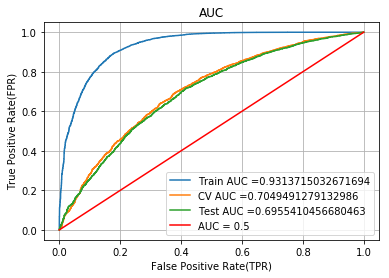

In [29]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

#  Confusion Matrix

the maximum value of tpr*(1-fpr) 0.7340591914284988 for threshold 0.843


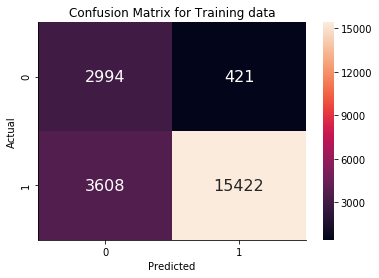

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

In [32]:
temp = pd.DataFrame(clf.cv_results_['params'])
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)

# Heatmap on Training and Test Data

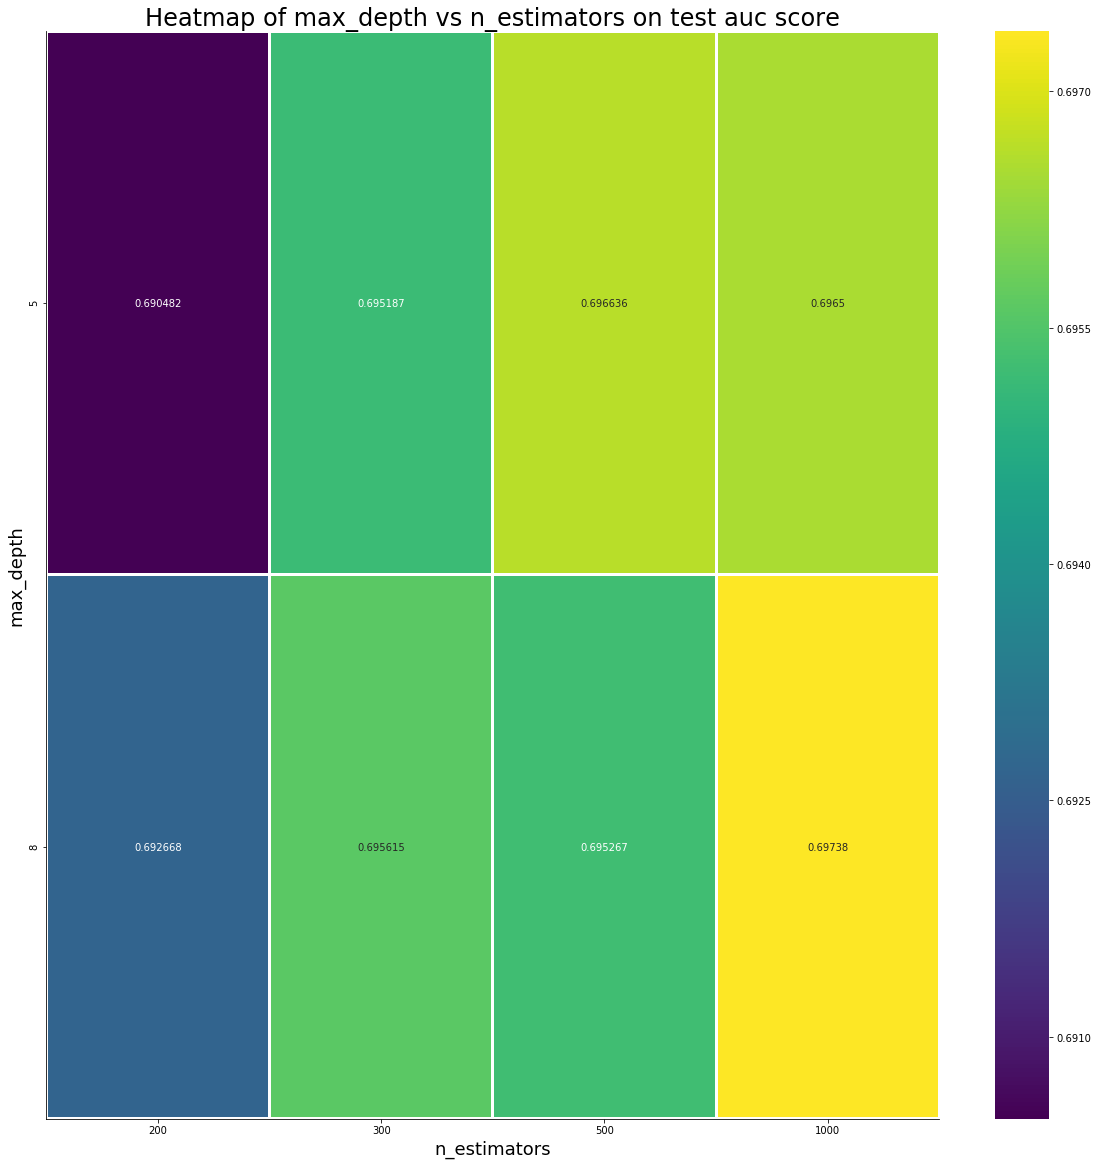

In [33]:
fig= plt.figure(figsize = (20,20))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

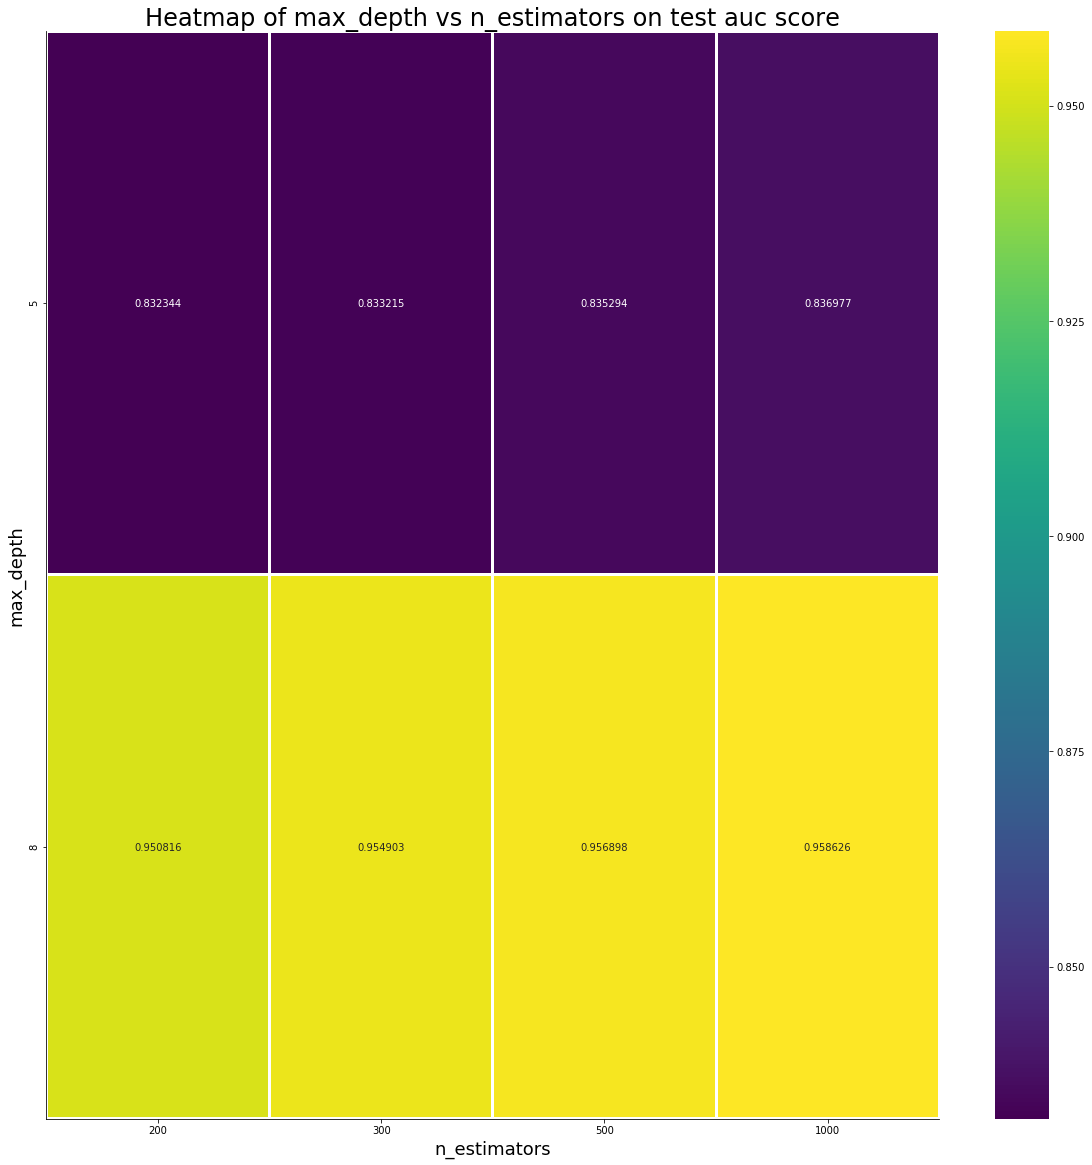

In [34]:
fig= plt.figure(figsize = (20,20))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

# categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V)<font color='red'> SET 4</font>

In [35]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((sparse.csr_matrix(X_train['Count_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_sub_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_sub_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_prefix_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_prefix_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(price_standardized_train),sparse.csr_matrix(quantity_standardized_train)
,sparse.csr_matrix(project_standardized_train),sparse.csr_matrix(tfidf_w2v_vectors_train[:22445]),sparse.csr_matrix(tfidf_w2v_vectors_title_train[:22445]))).tocsr()

X_crov = hstack((sparse.csr_matrix(X_cv['Count_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_sub_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_sub_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_prefix_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_prefix_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(price_standardized_cv),sparse.csr_matrix(quantity_standardized_cv)
,sparse.csr_matrix(project_standardized_cv),sparse.csr_matrix(tfidf_w2v_vectors_cv[:12000]),sparse.csr_matrix(tfidf_w2v_vectors_title_cv[:12000]))).tocsr()

X_ts = hstack((sparse.csr_matrix(X_test['Count_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_sub_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_sub_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_prefix_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_prefix_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(price_standardized_test),sparse.csr_matrix(quantity_standardized_test)
,sparse.csr_matrix(project_standardized_test),sparse.csr_matrix(tfidf_w2v_vectors_test[:13000]),sparse.csr_matrix(tfidf_w2v_vectors_title_test[:13000]))).tocsr()
    

In [36]:
X = X_tr.toarray()
X_mean = X[np.where(~np.isnan(X_tr.toarray()))].mean()
X[np.where(np.isnan(X_tr.toarray()))] = X_mean
X_tr = X
X_tr = sparse.csr_matrix(X_tr)
X_crov[np.where(np.isnan(X_crov.toarray()))] =X_mean
X_ts[np.where(np.isnan(X_ts.toarray()))] = X_mean

# # Find the best hyperparameter with max of AUC value  - max_depth and estimators

In [38]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300,], "max_depth":[4,5]}
model = RandomForestClassifier()
clf = GridSearchCV(model,param_grid=parameters,cv=3,scoring = "roc_auc")
clf.fit(X_tr,y_train[0:22445]["is_approved"])


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200, 300], 'max_depth': [4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [39]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# ROC_AUC Curve

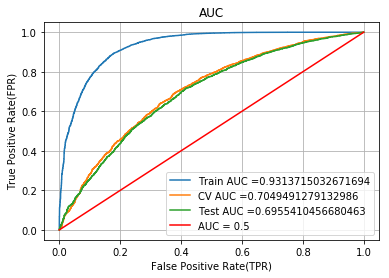

In [40]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix

the maximum value of tpr*(1-fpr) 0.7340591914284988 for threshold 0.843


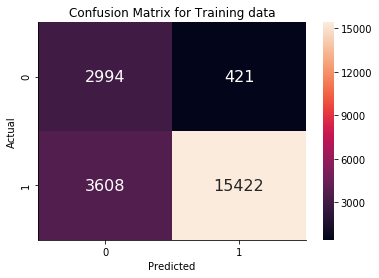

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

In [42]:
temp = pd.DataFrame(clf.cv_results_['params'])
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)

# Heatmap on Training and test data

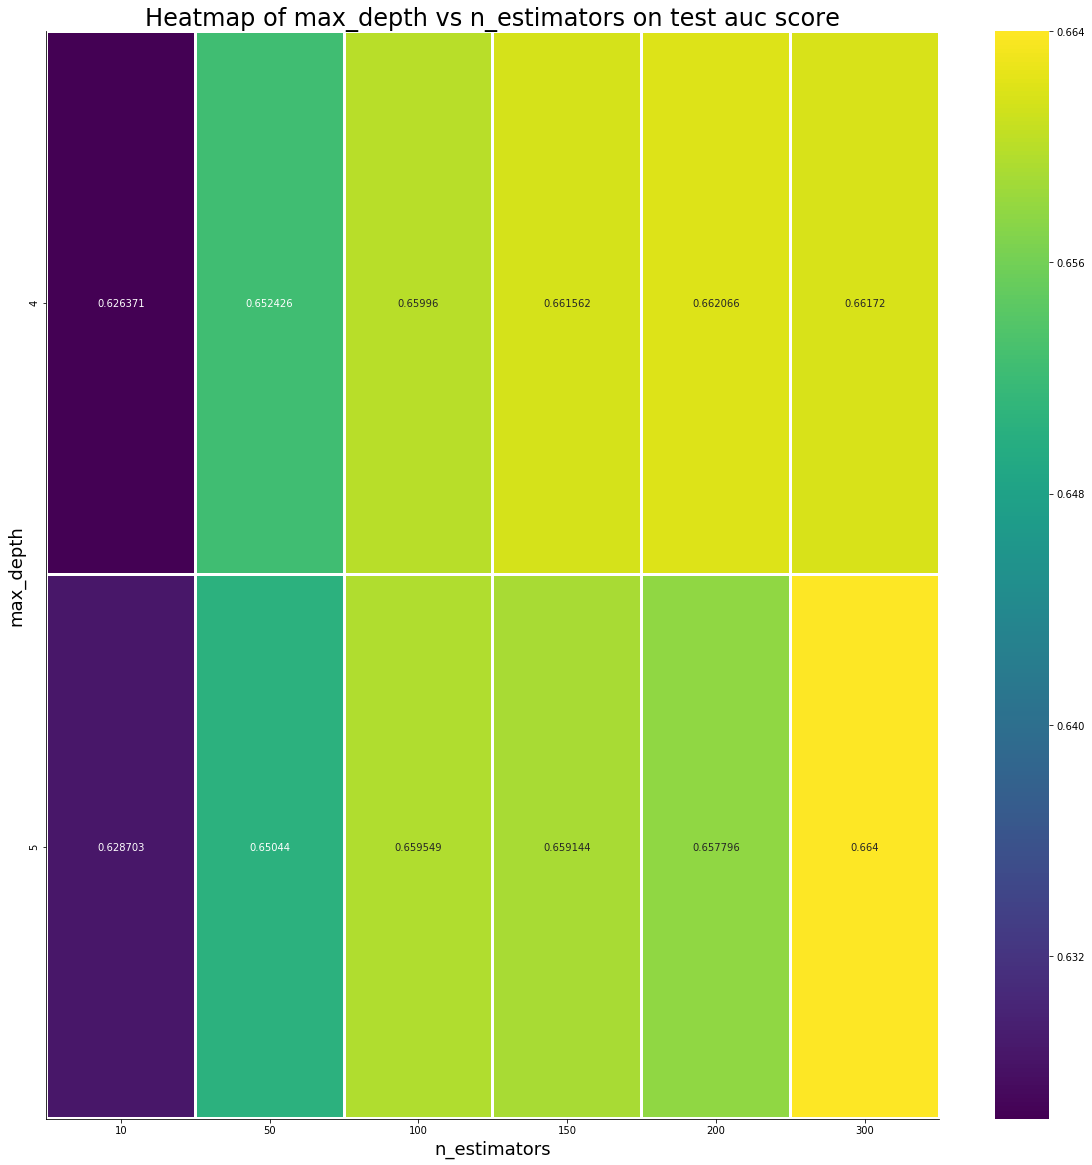

In [43]:
fig= plt.figure(figsize = (20,20))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

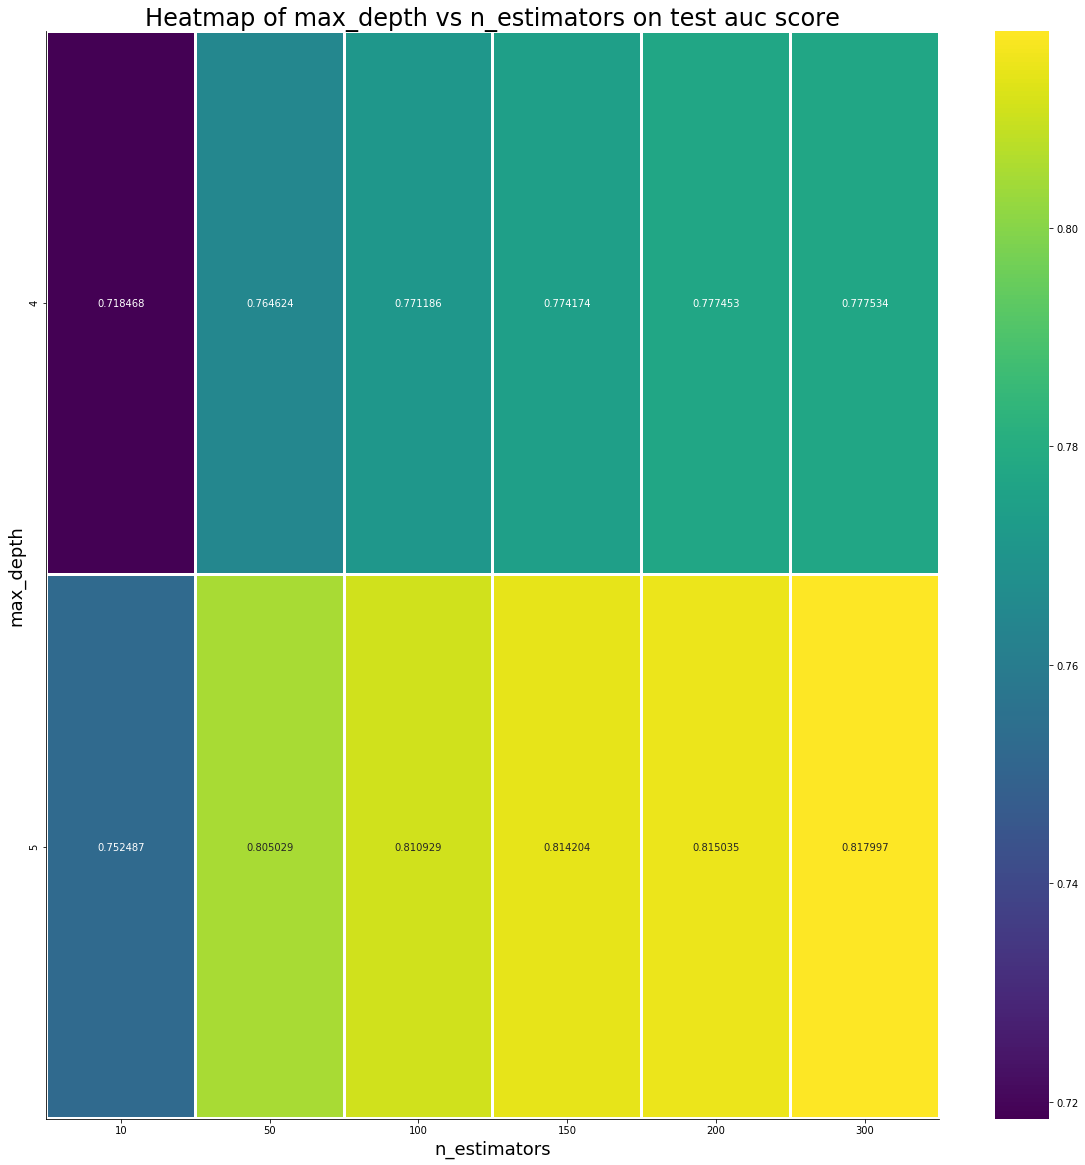

In [44]:
fig= plt.figure(figsize = (20,20))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

# ategorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)<font color='red'> SET 1</font>

In [39]:
# Please write all the code with proper documentation
from xgboost import XGBClassifier
import xgboost as xgb
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((sparse.csr_matrix(X_train['Count_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_sub_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_sub_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_prefix_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_prefix_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(price_standardized_train),sparse.csr_matrix(quantity_standardized_train)
,sparse.csr_matrix(project_standardized_train),essay_bow_train,title_bow_train)).tocsr()

X_crov = hstack((sparse.csr_matrix(X_cv['Count_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_sub_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_sub_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_prefix_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_prefix_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(price_standardized_cv),sparse.csr_matrix(quantity_standardized_cv)
,sparse.csr_matrix(project_standardized_cv),essay_bow_cv,title_bow_cv)).tocsr()

X_ts = hstack((sparse.csr_matrix(X_test['Count_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_sub_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_sub_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_prefix_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_prefix_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(price_standardized_test),sparse.csr_matrix(quantity_standardized_test)
,sparse.csr_matrix(project_standardized_test),essay_bow_test,title_bow_test)).tocsr()

In [41]:

#X_mean = X[np.where(~np.isnan(X_tr.toarray()))].mean()
X_tr[np.where(np.isnan(X_tr.toarray()))] =0
#X_tr = sparse.csr_matrix(X_tr)
X_crov[np.where(np.isnan(X_crov.toarray()))] = 0
X_ts[np.where(np.isnan(X_ts.toarray()))] = 0 

# Find the best hyperparameter with max of AUC value  - max_depth and estimators

In [42]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500]}#"max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(range(1)):
    model = XGBClassifier(max_depth = 6)
    clf = GridSearchCV(model,param_grid = parameters,cv = 3,scoring = "roc_auc")
    clf.fit(X_tr,y_train[0:22445]["is_approved"])


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [17:27<00:00, 1047.27s/it]


In [52]:
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

In [47]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# ROC_CURVE

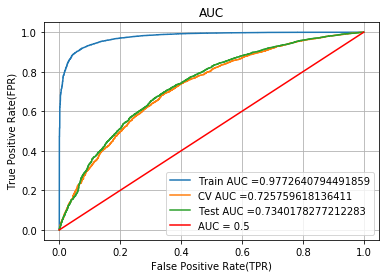

In [53]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.8508054401272861 for threshold 0.751


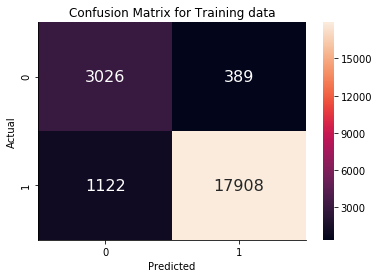

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()


# Heatmap on Training and Test Data

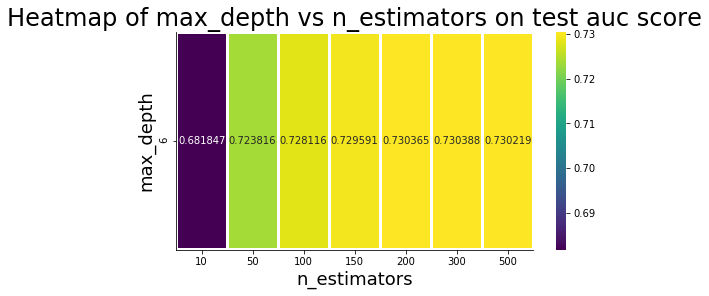

In [78]:
temp = pd.DataFrame(clf.cv_results_['params'])
temp["max_depth"] = [6]*7
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

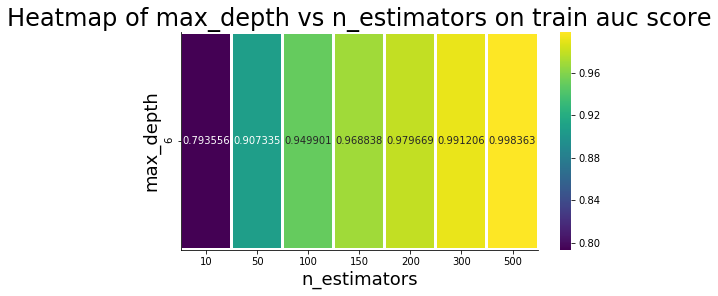

In [81]:
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on train auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

# Best Hyperparameter

In [82]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500]}#"max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(range(1)):
    model = XGBClassifier(max_depth = 8)
    clf = GridSearchCV(model,param_grid = parameters,cv = 3,scoring = "roc_auc")
    clf.fit(X_tr,y_train[0:22445]["is_approved"])


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [21:42<00:00, 1302.24s/it]


In [83]:
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

In [89]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# ROC_AUC Curve

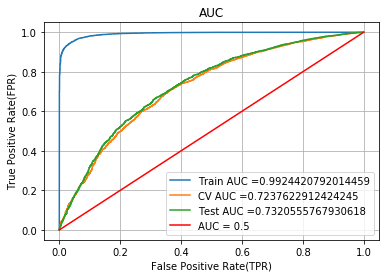

In [90]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix

the maximum value of tpr*(1-fpr) 0.9123189785104663 for threshold 0.748


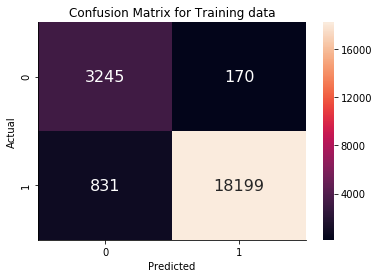

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# Heatmap on training and Test Data

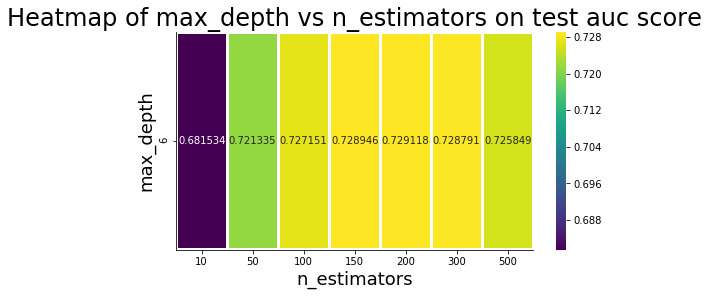

In [94]:
temp = pd.DataFrame(clf.cv_results_['params'])
temp["max_depth"] = [6]*7
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

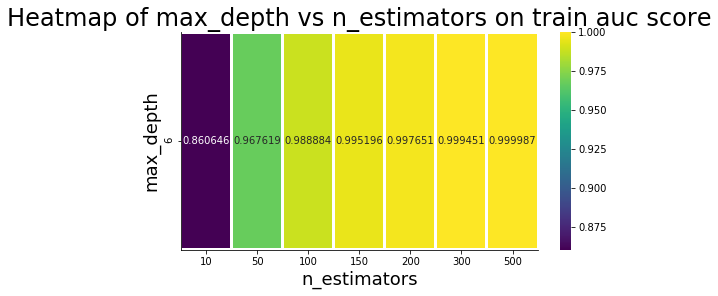

In [96]:
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on train auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

# categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(TFIDF)+ preprocessed_eassay (TFIDF)<font color='red'> SET 2</font>

In [97]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((sparse.csr_matrix(X_train['Count_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_sub_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_sub_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_prefix_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_prefix_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(price_standardized_train),sparse.csr_matrix(quantity_standardized_train)
,sparse.csr_matrix(project_standardized_train),essay_tfidf_train,title_tfidf_train)).tocsr()

X_crov = hstack((sparse.csr_matrix(X_cv['Count_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_sub_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_sub_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_prefix_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_prefix_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(price_standardized_cv),sparse.csr_matrix(quantity_standardized_cv)
,sparse.csr_matrix(project_standardized_cv),essay_tfidf_cv,title_tfidf_cv)).tocsr()

X_ts = hstack((sparse.csr_matrix(X_test['Count_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_sub_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_sub_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_prefix_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_prefix_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(price_standardized_test),sparse.csr_matrix(quantity_standardized_test)
,sparse.csr_matrix(project_standardized_test),essay_tfidf_test,title_tfidf_test)).tocsr()
    

In [98]:

#X_mean = X[np.where(~np.isnan(X_tr.toarray()))].mean()
X_tr[np.where(np.isnan(X_tr.toarray()))] =0
#X_tr = sparse.csr_matrix(X_tr)
X_crov[np.where(np.isnan(X_crov.toarray()))] = 0
X_ts[np.where(np.isnan(X_ts.toarray()))] = 0 

# Find the best hyperparameter with max of AUC value  - max_depth and estimators

In [99]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500]}#"max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(range(1)):
    model = XGBClassifier(max_depth = 6)
    clf = GridSearchCV(model,param_grid = parameters,cv = 3,scoring = "roc_auc")
    clf.fit(X_tr,y_train[0:22445]["is_approved"])
 

100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [34:42<00:00, 2082.74s/it]


In [ ]:
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

# Fitting the best Estimator and ROC_AUC Curve

In [100]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

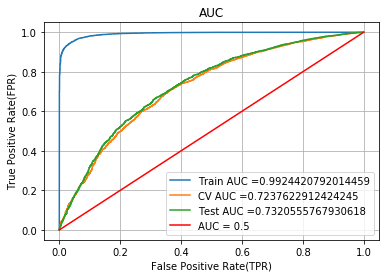

In [101]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix on Training Data

the maximum value of tpr*(1-fpr) 0.9123189785104663 for threshold 0.748


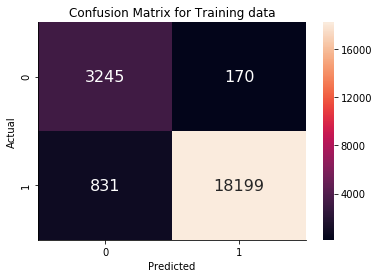

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# Heatmap 

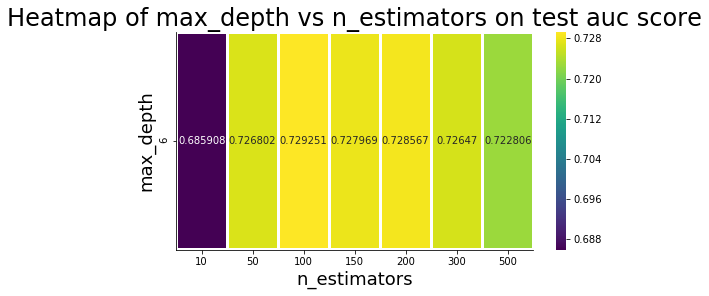

In [103]:
temp = pd.DataFrame(clf.cv_results_['params'])
temp["max_depth"] = [6]*7
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

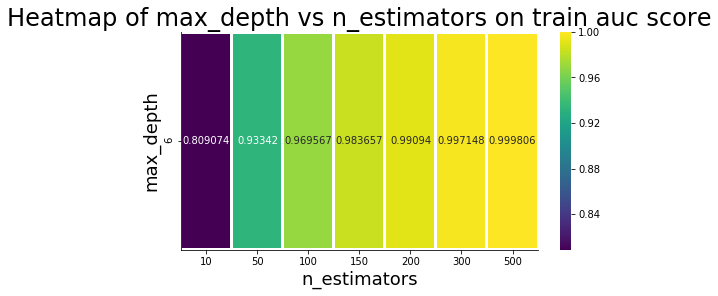

In [104]:
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on train auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

In [105]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
parameters = {"n_estimators":[10, 50, 100, 150, 200, 300, 500]}#"max_depth":[2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in tqdm(range(1)):
    model = XGBClassifier(max_depth = 6)
    clf = GridSearchCV(model,param_grid = parameters,cv = 3,scoring = "roc_auc")
    clf.fit(X_tr,y_train[0:22445]["is_approved"])


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [36:45<00:00, 2205.60s/it]


In [106]:
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

In [107]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# ROC_AUC Curve

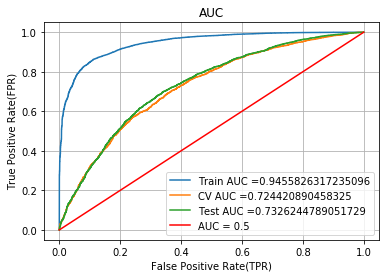

In [108]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix

the maximum value of tpr*(1-fpr) 0.766349656741417 for threshold 0.79


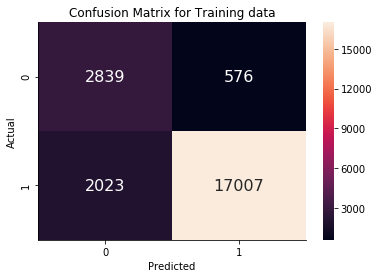

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# HeatMap

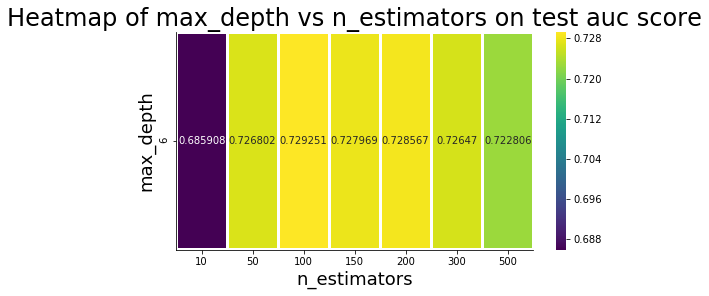

In [110]:
temp = pd.DataFrame(clf.cv_results_['params'])
temp["max_depth"] = [6]*7
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

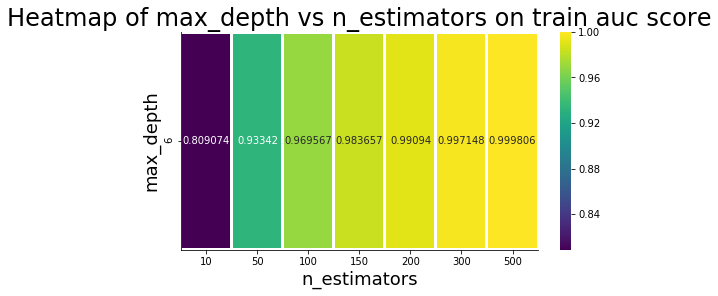

In [111]:
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on train auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

# categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(AVG W2V)+ preprocessed_eassay (AVG W2V),<font color='red'> SET 3</font>

In [33]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((sparse.csr_matrix(X_train['Count_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_sub_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_sub_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_prefix_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_prefix_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(price_standardized_train),sparse.csr_matrix(quantity_standardized_train)
,sparse.csr_matrix(project_standardized_train),sparse.csr_matrix(avg_w2V_vectors_title_train[:22445]),sparse.csr_matrix(avg_w2v_vectors_essays_train[:22445]))).tocsr()

X_crov = hstack((sparse.csr_matrix(X_cv['Count_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_sub_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_sub_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_prefix_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_prefix_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(price_standardized_cv),sparse.csr_matrix(quantity_standardized_cv)
,sparse.csr_matrix(project_standardized_cv),sparse.csr_matrix(avg_w2V_vectors_title_cv[:12000]),sparse.csr_matrix(avg_w2v_vectors_essays_cv[:12000]))).tocsr()

X_ts = hstack((sparse.csr_matrix(X_test['Count_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_sub_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_sub_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_prefix_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_prefix_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(price_standardized_test),sparse.csr_matrix(quantity_standardized_test)
,sparse.csr_matrix(project_standardized_test),sparse.csr_matrix(avg_w2V_vectors_title_test[:13000]),sparse.csr_matrix(avg_w2v_vectors_essays_test[:13000]))).tocsr()
    

In [34]:

#X_mean = X[np.where(~np.isnan(X_tr.toarray()))].mean()
X_tr[np.where(np.isnan(X_tr.toarray()))] =0
#X_tr = sparse.csr_matrix(X_tr)
X_crov[np.where(np.isnan(X_crov.toarray()))] = 0
X_ts[np.where(np.isnan(X_ts.toarray()))] = 0 

# Find the best hyperparameter with max of AUC value  - max_depth and estimators

In [36]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifier
parameters = {"n_estimators":[100, 150, 200, 300, 500]}
for i in tqdm(range(1)):
    model = XGBClassifier(max_depth=6)
    clf = GridSearchCV(model,param_grid = parameters,cv = 2,scoring = "roc_auc")
    clf.fit(X_tr,y_train[0:22445]["is_approved"])


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [1:02:36<00:00, 3756.86s/it]


In [42]:
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

In [43]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# ROC_AUC Curve

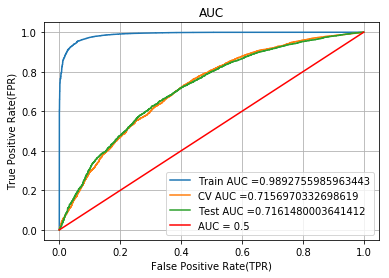

In [44]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix

the maximum value of tpr*(1-fpr) 0.8971264451828777 for threshold 0.786


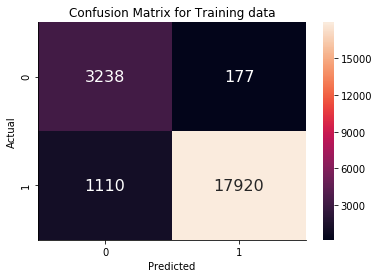

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

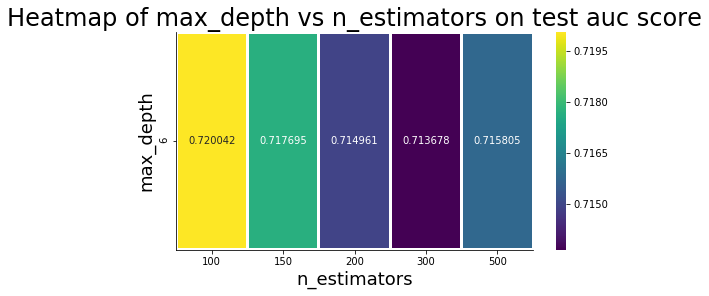

In [47]:
temp = pd.DataFrame(clf.cv_results_['params'])
temp["max_depth"] = [6]*5
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

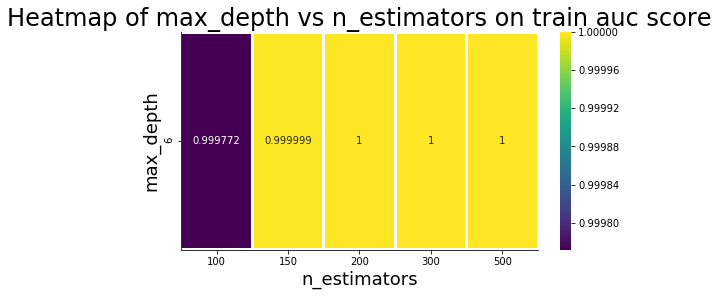

In [48]:
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on train auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

# categorical(instead of one hot encoding, try response coding: use probability values), numerical features + project_title(TFIDF W2V)+ preprocessed_eassay (TFIDF W2V) ,<font color='red'> SET 4</font>

In [22]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
from scipy import sparse
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_tr = hstack((sparse.csr_matrix(X_train['Count_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_sub_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_sub_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_school_state_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_prefix_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_prefix_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_0'][0:22445]).T,sparse.csr_matrix(X_train['Count_pro_1'][0:22445]).T
,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(X_train['Count_1'][0:22445]).T,sparse.csr_matrix(price_standardized_train),sparse.csr_matrix(quantity_standardized_train)
,sparse.csr_matrix(project_standardized_train),sparse.csr_matrix(tfidf_w2v_vectors_train[:22445]),sparse.csr_matrix(tfidf_w2v_vectors_title_train[:22445]))).tocsr()

X_crov = hstack((sparse.csr_matrix(X_cv['Count_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_sub_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_sub_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_school_state_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_prefix_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_prefix_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_0'][0:12000]).T,sparse.csr_matrix(X_cv['Count_pro_1'][0:12000]).T
,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(X_cv['Count_1'][0:12000]).T,sparse.csr_matrix(price_standardized_cv),sparse.csr_matrix(quantity_standardized_cv)
,sparse.csr_matrix(project_standardized_cv),sparse.csr_matrix(tfidf_w2v_vectors_cv[:12000]),sparse.csr_matrix(tfidf_w2v_vectors_title_cv[:12000]))).tocsr()

X_ts = hstack((sparse.csr_matrix(X_test['Count_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_sub_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_sub_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_school_state_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_prefix_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_prefix_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_0'][0:13000]).T,sparse.csr_matrix(X_test['Count_pro_1'][0:13000]).T
,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(X_test['Count_1'][0:13000]).T,sparse.csr_matrix(price_standardized_test),sparse.csr_matrix(quantity_standardized_test)
,sparse.csr_matrix(project_standardized_test),sparse.csr_matrix(tfidf_w2v_vectors_test[:13000]),sparse.csr_matrix(tfidf_w2v_vectors_title_test[:13000]))).tocsr()
    

In [23]:

#X_mean = X[np.where(~np.isnan(X_tr.toarray()))].mean()
X_tr[np.where(np.isnan(X_tr.toarray()))] =0
#X_tr = sparse.csr_matrix(X_tr)
X_crov[np.where(np.isnan(X_crov.toarray()))] = 0
X_ts[np.where(np.isnan(X_ts.toarray()))] = 0 

# Find the best hyperparameter with max of AUC value  - max_depth and estimators

In [25]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
#
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from xgboost import XGBClassifierassifier
parameters = {"n_estimators":[100, 150, 200, 300]}
for i in tqdm(range(1)):
    model = XGBClassifier(max_depth = 7)
    clf = GridSearchCV(model,param_grid = parameters,cv = 2,scoring = "roc_auc")
    clf.fit(X_tr,y_train[0:22445]["is_approved"])


100%|████████████████████████████████████████████████████████████████████████████████| 1/1 [1:02:38<00:00, 3758.86s/it]


In [29]:
y_train_prob_pred = proba_predict(clf,X_tr)
y_cv_prob_pred = proba_predict(clf,X_crov)
y_test_prob_pred = proba_predict(clf,X_ts)
fpr_train,tpr_train,thres_train = roc_curve(y_train[:22445]["is_approved"],y_train_prob_pred)
fpr_cv,tpr_cv,thres_cv = roc_curve(y_cv[:12000]["is_approved"],y_cv_prob_pred)
fpr_test,tpr_test,thres_test = roc_curve(y_test[:13000]["is_approved"],y_test_prob_pred)

# Fitting best estimator and ROC Curve

In [32]:
model = clf.best_estimator_
model.fit(X_tr,y_train[:22445]["is_approved"])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

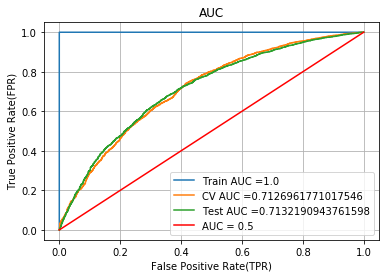

In [33]:
plt.plot(fpr_train, tpr_train, label="Train AUC ="+str(auc(fpr_train, tpr_train)))
plt.plot(fpr_cv, tpr_cv, label="CV AUC ="+str(auc(fpr_cv, tpr_cv)))
plt.plot(fpr_test, tpr_test, label="Test AUC ="+str(auc(fpr_test, tpr_test)))
plt.plot(np.linspace(0,1,600),np.linspace(0,1,600),label = "AUC = 0.5",color = "r")
plt.legend()
plt.xlabel("False Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

# Confusion Matrix

the maximum value of tpr*(1-fpr) 1.0 for threshold 2.0


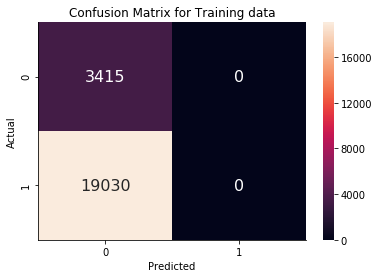

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_train[:22445]["is_approved"],pred_using_threshold(y_train_prob_pred,thres_train,tpr_train,fpr_train)),
                 annot=True,annot_kws={"size": 16}, fmt='g')
ax.set_title("Confusion Matrix for Training data")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
sns.despine()

# Heatmap 

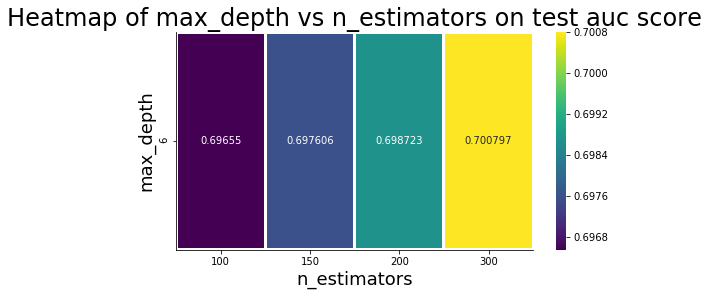

In [35]:
temp = pd.DataFrame(clf.cv_results_['params'])
temp["max_depth"] = [6]*4
a = dict()
a["mean_cv_test_score"] = list(clf.cv_results_['mean_test_score'])
a["mean_cv_train_score"] = list(clf.cv_results_['mean_train_score'])
temp2 = pd.DataFrame(a)
temp = pd.merge(temp,temp2,on = temp.index,how='left')
temp.drop(['key_0'],axis=1,inplace = True)
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_test_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on test auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

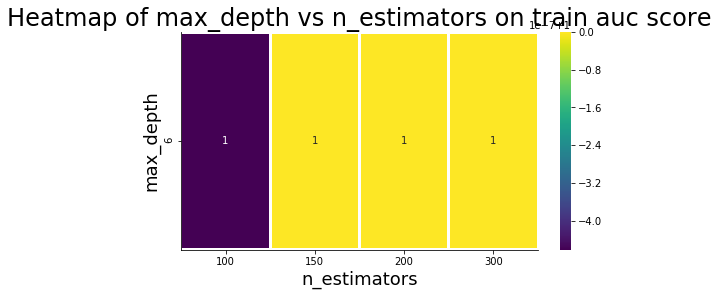

In [36]:
fig= plt.figure(figsize = (8,4))
result = temp.pivot(index='max_depth', columns='n_estimators', values='mean_cv_train_score')
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis',linewidths=2)
plt.title("Heatmap of max_depth vs n_estimators on train auc score",fontsize = 24)
plt.xlabel("n_estimators",fontsize = 18)
plt.ylabel("max_depth",fontsize=18)
sns.despine()

<h1>3. Conclusion</h1>

In [54]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
#Compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "n_estimators","max_depth", "AUC"]

x.add_row(["BOW", "RandomForrest",1000,8, 0.65])
x.add_row(["TFIDF", "RandomForrest",1000,8, 0.67])
x.add_row(["AVG W2V", "RandomForrest",1000 ,8,0.69])
x.add_row(["TFIDF W2V", "RandomForrest",300,5, 0.695])
x.add_row(["BOW", "XGBClassifier", 100,6, 0.730])
x.add_row(["TFIDF", "XGBClassifier", 100,6, 0.732])
x.add_row(["AVG W2V", "XGBClassifier", 100, 6,0.710])
x.add_row(["TFIDF W2V", "XGBClassifier", 300,7, 0.713])

print(x)

+------------+---------------+--------------+-----------+-------+
| Vectorizer |     Model     | n_estimators | max_depth |  AUC  |
+------------+---------------+--------------+-----------+-------+
|    BOW     | RandomForrest |     1000     |     8     |  0.65 |
|   TFIDF    | RandomForrest |     1000     |     8     |  0.67 |
|  AVG W2V   | RandomForrest |     1000     |     8     |  0.69 |
| TFIDF W2V  | RandomForrest |     300      |     5     | 0.695 |
|    BOW     | XGBClassifier |     100      |     6     |  0.73 |
|   TFIDF    | XGBClassifier |     100      |     6     | 0.732 |
|  AVG W2V   | XGBClassifier |     100      |     6     |  0.71 |
| TFIDF W2V  | XGBClassifier |     300      |     7     | 0.713 |
+------------+---------------+--------------+-----------+-------+
